<a href="https://colab.research.google.com/github/matheusbarraboni/dataScienceAlura/blob/main/desafioFinalAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

data = pd.read_csv(fonte)


In [ ]:
def criaBoxplot(eixoX, eixoY, dados, ordem=None, titulo='', cor=None):
  plt.figure(figsize= (10, 6))
  sns.boxplot(x=eixoX, y=eixoY, data=dados, order=ordem, hue=cor)
  plt.title(titulo)

## Desafio Final Alura

Neste Jupyter Notebook irei compartilhar minhas análises sobre os dados do Enem 2019

In [ ]:
# estou criando uma nova coluna com o valor total de todas as notas retirando os valores que a soma seja igual a zero
listaNotas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
data["NU_NOTA_TOTAL"] = data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].sum(axis = 1)
dados_sem_zero = data.query('NU_NOTA_TOTAL != 0')

Nesse próximo bloco analisei que a nota dos vestibulandos varia consideravelmente de acordo com a formação do ensino médio

Text(0.5, 1.0, 'Variação da nota total de acordo com o ensino médio')

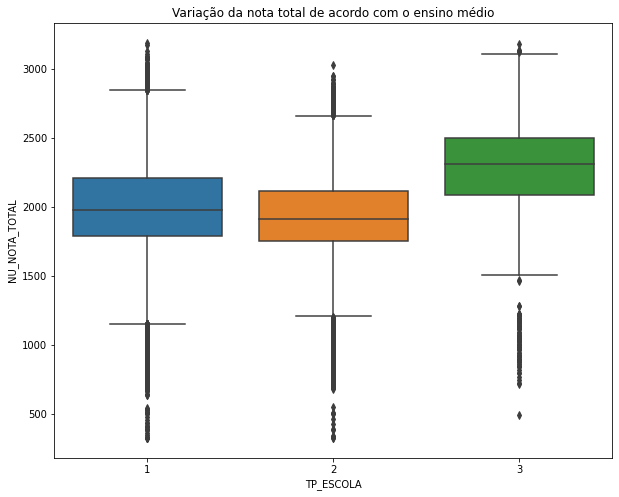

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=dados_sem_zero, x='TP_ESCOLA', y='NU_NOTA_TOTAL')
plt.title('Variação da nota total de acordo com o ensino médio')
# 1 - Não respondeu
# 2 - Pública
# 3 - Particular

Após verificar essa diferença fiquei curioso com a distribuição de vestibulandos que estudam em escolas públicas ou particulares

Quantidade de vestibulandos por tipo de escola no ensino médio:
Pública: 31045
Particular: 5528


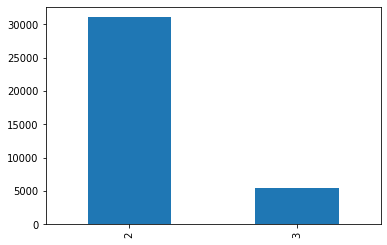

In [ ]:
# filtrar TP_ESCOLA para remover 1 (Não respondeu)
dados_escola = data.query('TP_ESCOLA != 1')
# verificando a diferença de quantidade de alunos que fizeram o colegial em escola pública  ou particular
quant_escola = dados_escola['TP_ESCOLA'].value_counts()
quant_escola.plot.bar()
print(f"Quantidade de vestibulandos por tipo de escola no ensino médio:")
print(f"Pública: {quant_escola[2]}")
print(f"Particular: {quant_escola[3]}")

Podemos ver que a grande maioria não estuda em escola particular, mesmo que de acordo como mostra o primeiro gráfico possui um ensino mais preparatório para o Enem

In [ ]:
# definido função para retornar um dicionário com as taxas de escola publica e particular
renda_ordenada = dados_sem_zero['Q006'].unique()
renda_ordenada.sort()
def criaTaxa(listaTaxa):
  dados_escola
  lista_taxas = {}
  for i in listaTaxa:
    taxas = dados_escola.query(f'Q006 == "{i}"')['TP_ESCOLA'].value_counts(normalize=True)
    lista_taxas[i] = taxas
  return lista_taxas

# usando a função pela renda
lista_taxas = criaTaxa(renda_ordenada)

As classificações de renda familiar vão de A à Q, onde A não possui nenhuma renda, e Q a renda é superior a R$19.960,00 

In [ ]:
for i in renda_ordenada:
  print(f'{i}: Escola pública    {lista_taxas[i][2]:.2f}%')
  print(f'   Escola particular {lista_taxas[i][3]:.2f}%')
  print()
  

A: Escola pública    0.97%
   Escola particular 0.03%

B: Escola pública    0.98%
   Escola particular 0.02%

C: Escola pública    0.95%
   Escola particular 0.05%

D: Escola pública    0.88%
   Escola particular 0.12%

E: Escola pública    0.88%
   Escola particular 0.12%

F: Escola pública    0.80%
   Escola particular 0.20%

G: Escola pública    0.80%
   Escola particular 0.20%

H: Escola pública    0.63%
   Escola particular 0.37%

I: Escola pública    0.62%
   Escola particular 0.38%

J: Escola pública    0.53%
   Escola particular 0.47%

K: Escola pública    0.50%
   Escola particular 0.50%

L: Escola pública    0.37%
   Escola particular 0.63%

M: Escola pública    0.35%
   Escola particular 0.65%

N: Escola pública    0.28%
   Escola particular 0.72%

O: Escola pública    0.23%
   Escola particular 0.77%

P: Escola pública    0.16%
   Escola particular 0.84%

Q: Escola pública    0.10%
   Escola particular 0.90%



Como mostra a tabela acima a porcentagem de vestibulandos que cursaram o ensino médio em escola particular aumenta de acordo com a renda familiar.

Podemos ver essa distribuição visualmente no gráfico abaixo

Text(0.5, 1.0, 'Quantidade de vestibulandos por renda e tipo de colegial')

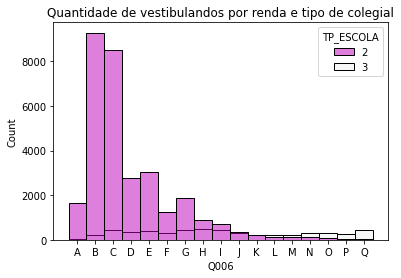

In [ ]:
dados_escola = data.query('TP_ESCOLA != 1').sort_values('Q006')
sns.histplot(dados_escola, x='Q006', hue='TP_ESCOLA', palette="light:m_r")
plt.title('Quantidade de vestibulandos por renda e tipo de colegial')
# Tipo de escola 2 = Pública
# Tipo de escola 3 = Particular

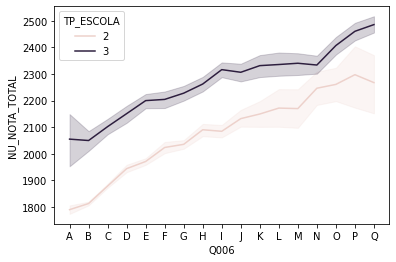

In [ ]:
# filtrando o tipo de escola sem a opção "Não respondeu"
dados_escola_sem_zero = dados_sem_zero.query('TP_ESCOLA != 1')
#ordenando o Dataframe de acordo com a coluna 'Q006'
dados_escola_sem_zero = dados_escola_sem_zero.sort_values('Q006')

sns.lineplot(data=dados_escola_sem_zero, x='Q006', y='NU_NOTA_TOTAL', hue='TP_ESCOLA')

# Tipo de escola 2 = Pública
# Tipo de escola 3 = Particular

No gráfico acima podemos visualizar a variação das notas de acordo com as rendas e o tipo de ensino médio.

Abaixo temos um gráfico mais detalhado

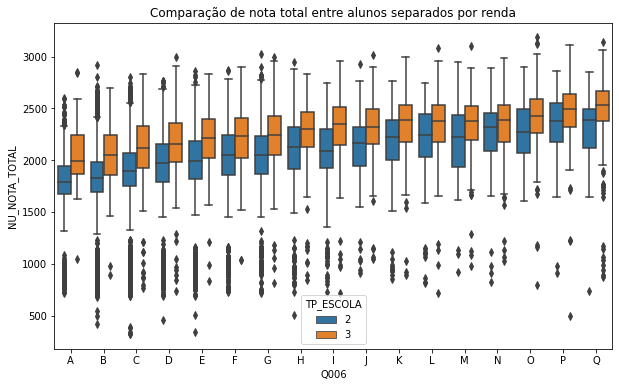

In [ ]:
criaBoxplot(eixoX='Q006', eixoY='NU_NOTA_TOTAL', dados=dados_escola_sem_zero, ordem=renda_ordenada,
         titulo='Comparação de nota total entre alunos separados por renda',
         cor = 'TP_ESCOLA')


Por mais que o ensino médio interfira nas notas, ainda sim a diferença de renda familiar impacta muito nessa variação, infelizmente.

Por fim após analisar esse dados podemos concluir que o ensino médio particular tende a dar mais resultado de aprendizado (pelo menos no quesito do Enem) do que o ensino público, e quem acaba se aproveitando disso são os vestibulandos que vêm de familias com renda maiores, pois conseguem pagar esse tipo de ensino. 

Porém vimos que esse não é o único aspecto que interfere nas notas, pois mesmo vestibulandos que estudam/estudaram em rede pública, mas com rendas maiores ainda têm vantagem no quesito nota. Isso pode ter relação com tempo disponivel para estudar, acesso a internet ou diversos outros fatores que estão fora do escopo dessa análise

Sugiro que para diminuir essa diferença de nota os governos responsáveis analisem a situação de suas escolas e o motivo da educação não ser igual ao das escolas particulares.